# Price of Diamonds


- toc: true
- branch: master
- badges: true
- comments: true
- author: Christin Choi
- categories: [fastpages, jupyter]

## 1 Introduction
Diamonds are forever is the revolutionary slogan of DeBeers' most famous ad campaign in 1947.  Their slogan still rings true today. I remember watching their commercials as a kid the shadows of couples playing out their life changing moments on the tv screen and the only thing the ad shows ultimately is the diamond ring.  Even before these ads played in front of me I have always been entranced by these sparkly rocks.  I suppose it's the girly girl in me wanting shiny sparkly things... not so different than a bird I suppose. The tv ads just cemented my shallow childish wants for the future.  Romance and wealth. 

### 1.1 Who am I?
Including this section since it was in an example.  I am, dare I say it, a middle aged woman who in 2021 got engaged, married and popped out a baby.  I'm not much of a planner, but this was not my plan.  I was laid off at the end of 2020 was enjoying my time off with a nice severance package when the events of 2021 transpired (pregnancy) and so going back into the workforce was not my top priority.  In any case, I had an opportunity to be funded for training hence the enrollment in this class.  I've been interested in learning about becoming a data analyst so a certificate in data science seemed close enough and a good idea. Forget the fact that I have an infant to take care of, horrible time management skills and of course my academic career was like pulling teeth for me. All these personal life events lead to the motivation for this topic.

### 1.2 Motivation 
My personal motivation to study this topic is a bit frivolous.  I've always been captivated by the sparkly gems ever since I was a tiny tot.  Dreamt of having my own 'rock' when I got married.  However, the fates did not allow for this.  I found a man who thought the whole idea of a diamond engagement ring to be a scam.  It is most likely true since we all know DeBeers  creates an artificial scarcity of the stone and their famous marketing strategy to convince the world we all needed a diamond engagement ring. But in any case, diamonds still captivate my attention.  According to the latest news articles diamonds are still in high demand as indicated by the current rising prices, so it is of public interest what determines the price of diamonds. 
My fiance/husband indulged the diamond shopping portion although ultimately we did not purchase a mined diamond. I learned this after the fact, but at one point we were at a jewelry store and the saleswoman was trying to sell us on a Forevermark diamond.  Forevermark diamond is "hand selected and hand crafted.  Less than 1% of diamonds are eligbile to be Forevermark." My fiance looked at me and said something along the lines of is this the diamond of your dreams?  I looked at the price tag and knew right off it was over-priced and the bargain shopper in me could not agree to this. So I declined the diamond.  Who knew that was my one and only chance for a mined diamond. Insert crying emoji here.  I learned after we were married that he was going to buy it so he could propose to me when we were visiting my family for Thanksgiving on the East coast. He was running out of time when we were at the jewelry store so he was just going to buy it. But I guess it wasn't meant to be. 
So the final project question is can we predict the diamond price based on any of its features.

## 2 Methods

### 2.1 Data Source

The data set I found on Kaggle was a simple .csv file titled 'Diamond Prices2022.csv'.  The dataset looked at the attributes of approximately 54,000 round cut diamonds. The ten features include carat, cut, color, clarity, depth, table, price, x (length in mm), y (width in mm), and z (depth in mm).  Prices were in U.S. dollars ($). 

**Feature Descriptions:**
Price: in U.S. dollars ($326-$18,823)

**Carat**: The physical weight of the diamonds are measured in carats. The diamonds in the data range from 0.2-5.01 carats. One carat equals 1/5 of a gram and is subdivided into 100 points. 

**Cut**: The grading of the cut ranges from Fair, Good, Very Good, Premium, Ideal.  A diamond’s cut refers to how well-proportioned the dimensions of a diamond are, and how these surfaces, or facets, are positioned to create sparkle and brilliance (www.bluenile.com/education/diamonds/cut/).

**Clarity**: The grading of the clarity ranges from I1,SI2,SI1,VS2,VS1,VVS2,VVS1,IF(internally flawless) in the dataset. I1 being the Included diamonds.  They have obvious inclusions that are likely visible to the naked eye.

**Dimensions (x length, y width, z depth - in mm)**
Depth Total Depth Percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) The depth of the diamond is its height (in mm) measured from the culet (bottom tip) to the table (flat, top surface).

Table width of the top of the diamond relative to widest point (43--95)

A diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye. The ideal table cut diamond will give the diamond stunning fire and brilliance.


### 2.2 Methods

Began by importing the libraries.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
import plotly.graph_objects as go

import sklearn.datasets
import sklearn.cluster
import sklearn.linear_model
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

Loading the data and looked at the head, description, info.  Also checked for any null data. Dropped the first column as it was just the index. Filtered out min values of 0 for x, y, and z.  They indicate faulty values in the data since 0 would mean it was without dimension or only 2D. 

Used the scatterplot to plot the numerical categories against the price.  Found the highest correlation coefficient to be carat or weight of diamond. From there used linear regression from sklearn to train/test the data.

In [2]:
#loaded data
diamond=pd.read_csv('Diamonds Prices2022.csv')

In [3]:
diamond.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [4]:
diamond.describe()

Unnamed: 0         carat         depth         table         price  \
count  53943.000000  53943.000000  53943.000000  53943.000000  53943.000000   
mean   26972.000000      0.797935     61.749322     57.457251   3932.734294   
std    15572.147122      0.473999      1.432626      2.234549   3989.338447   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13486.500000      0.400000     61.000000     56.000000    950.000000   
50%    26972.000000      0.700000     61.800000     57.000000   2401.000000   
75%    40457.500000      1.040000     62.500000     59.000000   5324.000000   
max    53943.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53943.000000  53943.000000  53943.000000  
mean       5.731158      5.734526      3.538730  
std        1.121730      1.142103      0.705679  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

In [5]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
#Check for null values:
diamond.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
#Dropped the first column as it was unecessary
diamond.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
#Dropping dimensionless diamonds
diamond = diamond.drop(diamond[diamond["x"]==0].index)
diamond = diamond.drop(diamond[diamond["y"]==0].index)
diamond = diamond.drop(diamond[diamond["z"]==0].index)
diamond.shape

(53923, 10)

In [9]:
#Set x and y:
x= diamond.drop(['price'],axis=1)
y= diamond.price

In [10]:
print(x.shape)
print(y.shape)
print(x.ndim)
print(y.ndim)
print(x.size)
print(y.size)

(53923, 9)
(53923,)
2
1
485307
53923


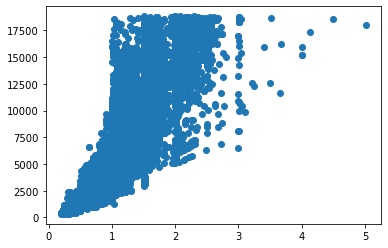

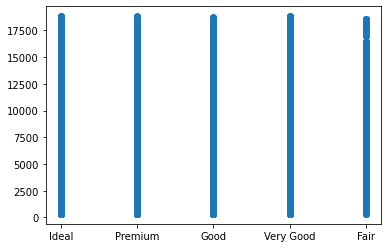

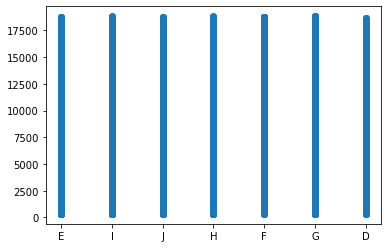

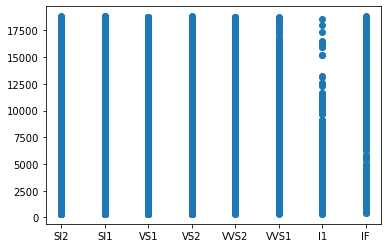

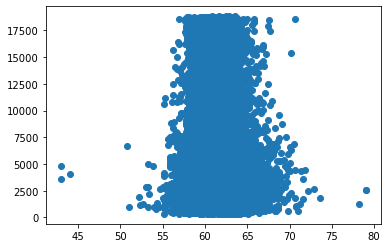

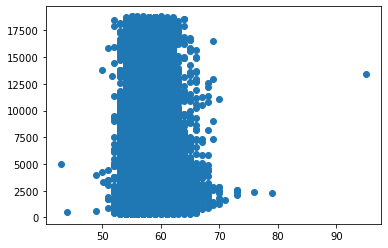

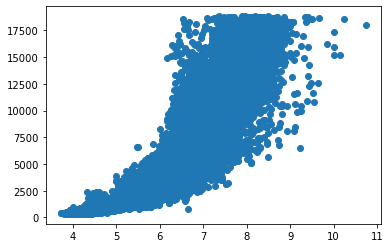

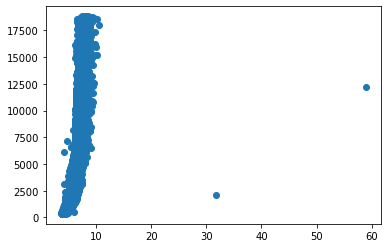

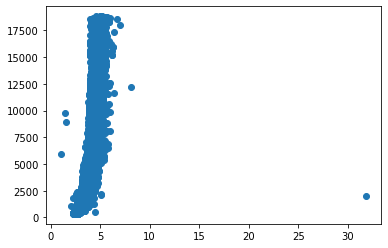

In [11]:
#Used a scatter plot to see what the data looked like when plotting features vs price:
for i in range (x.shape[1]):
    plt.scatter(x.values[:,i],y)
    plt.show()

In [12]:
#np.corrcoef(x.values[:,1],y)
print(type(x.values[:,0]))
print(type(y))
print(x.values[:,0].shape)
print(y.shape)
print(x.values[:,0].dtype)
print(y.dtype)

print(np.corrcoef(x.values[:,0].astype(float),y.astype(float)))
print(np.corrcoef(x.values[:,4].astype(float),y.astype(float)))
print(np.corrcoef(x.values[:,5].astype(float),y.astype(float)))   

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
(53923,)
(53923,)
object
int64
[[1.         0.92159204]
 [0.92159204 1.        ]]
[[ 1.         -0.01071159]
 [-0.01071159  1.        ]]
[[1.         0.12722925]
 [0.12722925 1.        ]]


In [17]:
#Looked at the correlation between each numerical feature -- carat having the highest correlation
diamond.corr()['price'].sort_values(ascending=False)

price    1.000000
carat    0.921592
x        0.887229
z        0.868206
y        0.867862
table    0.127229
depth   -0.010712
Name: price, dtype: float64

In [18]:
#Carat had the highest correlation to the price. 
#Used linear regression machine learning to predict diamond prices based on carat size

x=diamond.drop(columns='price')
y=diamond['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [19]:
print('Training features', x_train.columns)
print('Training set shape', x_train.shape)
print('Test set shape', x_test.shape)

Training features Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')
Training set shape (43138, 9)
Test set shape (10785, 9)


In [20]:
x_train_transformed = x_train.iloc[:,0].to_numpy().reshape(-1,1)
x_test_transformed = x_test.iloc[:,0].to_numpy().reshape(-1,1)


In [21]:
model = sklearn.linear_model.LinearRegression()
model.fit(x_train_transformed,y_train)

LinearRegression()

In [22]:
# for Linear Regression
print(model.intercept_)
print(model.coef_)

-2249.9287887424957
[7742.87053545]


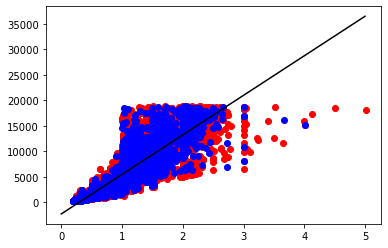

In [23]:
# for Linear Regression

x_eq= np.linspace(0,5,10)

plt.scatter(x_train.iloc[:,0],y_train,color='red')
plt.scatter(x_test.iloc[:,0],y_test,color='blue')


eq= model.intercept_ + model.coef_*x_eq

plt.plot(x_eq,eq, 'k')

plt.show()


In [24]:
#y_pred = model.predict(x_test_transformed)
y_pred = model.predict(x_test_transformed)
print('MSE = %.2f' % mean_squared_error(y_test, y_pred))
print('R^2 = %.2f' % r2_score(y_test, y_pred))

MSE = 2445492.79
R^2 = 0.85


The test data showed an R squared of 0.85 which isn't too bad.  You can see from the graph above that even though the line fit was ok and acceptable with a value of 0.85, the higher the carat size the greater the distance from the fit of the line. It leaves a lot to be desired.
When shopping for diamonds it is important to consider the 4 C's (cut, carat, clarity, and color). Carat is an obvious factor in determining the price, but from looking at this data it isn't the only attribute that factors into price. 
One website states cut is the most important factor, however since it is an objective attribute with a human grading the cut it was hard to quantify and input the data for consideration.
